# Intro to RKHorn code


Let's first call the library! And matplotlib, too.

In [1]:
from rkhorn import *
from rkhorn import ChargedPionFluxMiniBooNE
import matplotlib.pyplot as plt
import numpy as np

Next, we can use this code to simulate the beamspot and resulting focused flux of pi+ at the BNB with the horn system.

In [2]:
rkhornsim = ChargedPionFluxMiniBooNE(proton_energy=8.0e3 + M_P, meson_charge=1.0,
                                     solid_angle_cut=0.00924, n_samples=2000, n_pot=1)

Once we have specified the details of our target and horn system and constructed them inside ```rkhornsim```, we can simulate the full production and transport of the pions through the horn system via ```rkhornsim.simulate()```

In [3]:
rkhornsim.simulate()

[[3.83388894e+03 6.51089681e-01 2.04297137e-09]
 [5.96734317e+02 6.66930200e-01 4.74915758e-04]
 [3.44745860e+03 1.32777724e-01 5.93805999e-05]
 ...
 [3.43012046e+03 7.68830013e-01 1.13506407e-09]
 [2.06962448e+03 6.28956789e-01 3.50239600e-06]
 [3.41876938e+03 6.62823592e-02 8.55973180e-05]]
3833.8889357347716
596.7343170068307
3447.458602519662
3282.643795082729
2684.16334838817
4357.976282881648
5066.531845117664
6978.560046252853
5653.507029360061
5310.661179853304
6360.672019202661
5270.075567619765
380.67162574178656
1025.1761260235799
4023.4925673238554
3704.8492754885033
3549.175231121236
4585.151488610412
2492.778626307079
5619.319607566489
2397.570104276367
6986.938868089909
2992.7358503471587
1099.1044980443476
1797.8272132271827
5102.769965611876
5423.81510310528
2241.871450551188
6995.242028917393
1739.2478448362829
783.5919068407234
1102.694173901162
4352.514236852904
3001.020692831188
359.69274289811426
3407.247134903217
840.7349524198029
6816.288881705008
2317.237050565

In [4]:
rkhornsim.meson_flux_pre_horn[:,0]

array([3833.88893573,  596.73431701, 3447.45860252, ..., 3430.12045523,
       2069.62447543, 3418.76937973])

[2.0429713735562783e-09, 0.00047491575816387274, 5.938059994680326e-05, 2.4729493736519137e-05, 3.204166275824651e-05, 7.847105947208363e-08, 4.911873064362927e-08, 3.233009823715063e-07, 3.564079454339711e-13, 6.394352717915325e-07, 9.9409393316631e-16, 1.4599513246024831e-06, 0.0, 0.00028219940860265265, 1.135135220839504e-07, 4.248945337996597e-05, 4.900675215022885e-05, 2.3522394065995897e-09, 0.00019111279606623074, 2.205310179819603e-10, 2.2407878963969078e-07, 4.6640113537993114e-08, 1.4716424997723284e-05, 0.00043775348128969124, 0.00030025038573193956, 1.3410828679199368e-12, 7.241810258695204e-07, 6.172235769244321e-07, 6.4225905716527355e-09, 2.9744401653091654e-05, 0.00022403329484862585, 0.00010382166791646245, 1.645846592005375e-07, 2.1158491551366262e-06, 0.0014068971176026625, 5.229959872012501e-09, 0.001037687777033023, 4.867025403280065e-15, 0.00022553081705978682, 3.718083175278208e-16, 4.322380219717366e-05, 2.2105601703784e-05, 5.063800256287186e-13, 7.278506785264

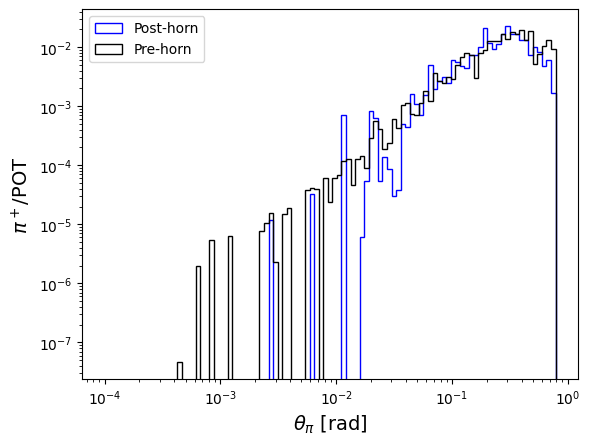

In [5]:
pi_thetas_pre_horn = rkhornsim.meson_flux_pre_horn[:,1]
pi_momenta_pre_horn = rkhornsim.meson_flux_pre_horn[:,0]
pi_weights_pre_horn = rkhornsim.meson_flux_pre_horn[:,2]

pi_thetas_post_horn = rkhornsim.pip_theta_post_horn
pi_momenta_post_horn = rkhornsim.pip_p_post_horn
pi_weights_post_horn = rkhornsim.pip_wgt_post_horn   # the number of pions that decayed pointing within detector solid angle

print(pi_weights_post_horn, pi_weights_pre_horn)

theta_bins = np.logspace(-4, np.log10(np.pi/4), 100)
momentum_bins = np.logspace(1, np.log10(7000.0), 100)

plt.hist(pi_thetas_post_horn, weights=pi_weights_post_horn, bins=theta_bins, histtype='step', color='b', density=False, label="Post-horn")
plt.hist(pi_thetas_pre_horn, weights=pi_weights_pre_horn, bins=theta_bins, density=False, color='k', histtype='step', label="Pre-horn")
plt.yscale('log')
plt.ylabel(r"$\pi^+$/POT", fontsize=14)
plt.xlabel(r"$\theta_\pi$ [rad]", fontsize=14)
plt.xscale('log')
plt.legend(loc="upper left")
plt.show()

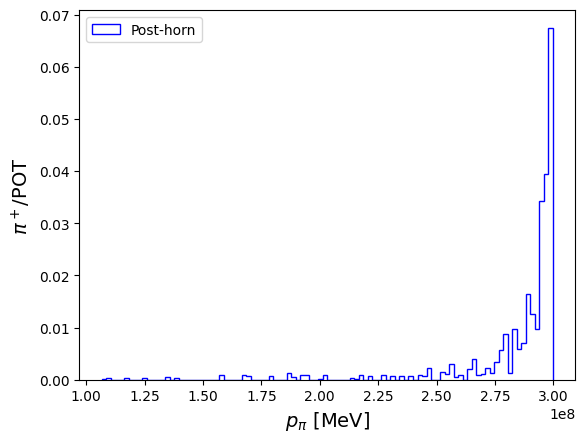

In [6]:
plt.hist(pi_momenta_post_horn, weights=pi_weights_post_horn, bins=100, histtype='step', color='b', label="Post-horn")
#plt.hist(pi_momenta_pre_horn, weights=pi_weights_pre_horn, bins=momentum_bins, color='k', histtype='step', label="Pre-horn")
plt.ylabel(r"$\pi^+$/POT", fontsize=14)
plt.xlabel(r"$p_\pi$ [MeV]", fontsize=14)
plt.legend(loc="upper left")
plt.show()